<a href="https://colab.research.google.com/github/pkhamchuai/Optimization/blob/main/Gauss_Newton_for_Parameter_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gauss-Newton method for parameter estimation


The task is to estimate the parameters $p_1$ and $p_2$ of the function
$f(x) = \frac{p_1x}{p_2+x}$ using Gauss-Newton method. 

You can use this code to perform parameter estimation of your interested function. For that you'll need to know the Jacobian matrix, aka, the derivatives of $f(x)$ wrt to $p_1$ and $p_2$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# sample data
X = np.array([0.200, 0.200, 0.222, 0.222, 0.286, 0.286, 0.400, 0.400, 0.667, 0.667, 2.000, 2.000])
Y = np.array([0.0831, 0.0781, 0.0948, 0.0891, 0.1163, 0.1213, 0.1467, 0.1663, 0.2586, 0.2260, 0.5557, 0.4207])

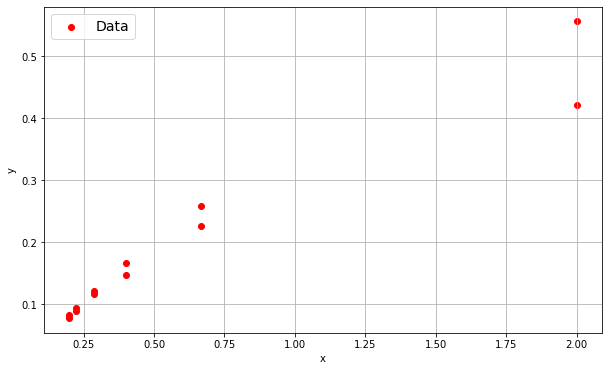

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X, Y, c='red', marker='o', label="Data")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.legend(fontsize=14)
plt.grid(True)
plt.show()

In [4]:
# initial guesses of parameters
P0 = [1, 1]

In [5]:
# the function that we want to fit
def f(X, P0):
  return (P0[0]*X)/(P0[1]+X)

The **Jacobian matrix**, in case you don't know it, is defined as follows

$\mathbf{J}=\left[\begin{array}{ccc}
\frac{\partial f_1}{\partial p_1} & \frac{\partial f_1}{\partial p_2} & \frac{\partial f_1}{\partial p_3} \\
    \frac{\partial f_2}{\partial p_1} & \frac{\partial f_2}{\partial p_2} & \frac{\partial f_2}{\partial p_3} \\
    \frac{\partial f_3}{\partial p_1} & \frac{\partial f_3}{\partial p_2} & \frac{\partial f_3}{\partial p_3}
\end{array}\right] \in \mathbb{R^{i\times j}}$

The 1st and 2nd columns of our Jacobian matrix are derivatives of $f(x)$ wrt to $p_1$ and $p_2$. For $i > j$, $i$ is number of sample points (pairs of $x$ and $y$), and $j$ is number of parameters.
In this case,

$\mathbf{J} = \left[ -\frac{x}{p_2+x} \space\space \frac{p_1x}{(p_2+x)^2}  \right]$

For Gauss-Newton, the algorithm is ($k$ is iteration number):

1.   compute search direction $d_k = (J^TJ)^{-1}J^Tr  \in \mathbb{R}^j$
2.   optionally compute step length $t_k \in \mathbb{R}$
3.   iterate $p_{k+1} = p_k + t_kd_k$ 
4.   check stopping criterien
5.   if criterien is not met, redo from step 1.

$p_{k+1}$ are the fitted parameters.

In [6]:
# Jacobian
J = np.zeros([len(X), len(P0)])
Iter = 0

In [7]:
while True:
  Iter += 1
  j1 = -1*(X/(P0[1]+X))
  j2 = (P0[0]*X)/((P0[1]+X)**2)
  J[:, 0] = j1
  J[:, 1] = j2

  r = Y - f(X, P0) # objective function
  t1 = np.linalg.inv(np.dot(J.T, J))
  t2 = np.dot(t1, J.T)
  t3 = np.dot(t2, r)
  P1 = P0 - t3 # Gauss-Newton update
  t4 = abs(P1-P0)

  if max(t4) <= 1e-6:
    break
  P0 = P1

x1 = float('{:.4f}'.format(P0[0]))
x2 = float('{:.4f}'.format(P0[1]))

print(f'The parameters are:\nx1 = {x1}\nx2 = {x2}\nIterations = {Iter}')


The parameters are:
x1 = 1.0313
x2 = 2.2189
Iterations = 6


# Plotting

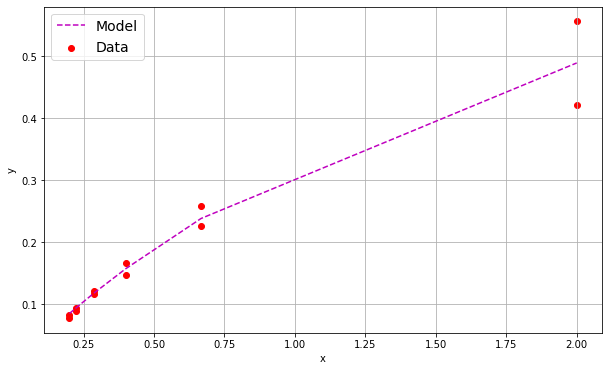

In [8]:
pred = f(X, P0)
plt.figure(figsize=(10,6))
plt.scatter(X, Y, c='red', marker='o', label="Data")
plt.plot(X, pred, '--m', label="Model")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.legend(fontsize=14)
plt.grid(True)
plt.show()

In [9]:
# coefficients of determinations
ssr = np.sum((Y-pred)**2)
sse = np.sum((Y-np.mean(Y))**2)
r2 = 1-(ssr/sse)
print(r2)

0.9598634601190857
